# DAT210x - Programming with Python for DS

## Module4- Lab1

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [6]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [7]:
reduce_factor = 100

Load up the scanned armadillo:

In [8]:
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

### PCA

We train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

In [9]:
def do_PCA(armadillo, svd_solver):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2,svd_solver = svd_solver)
    pca.fit(armadillo)
    pca = pca.transform(armadillo)
    
    return pca

### Preview the Data

<IPython.core.display.Javascript object>


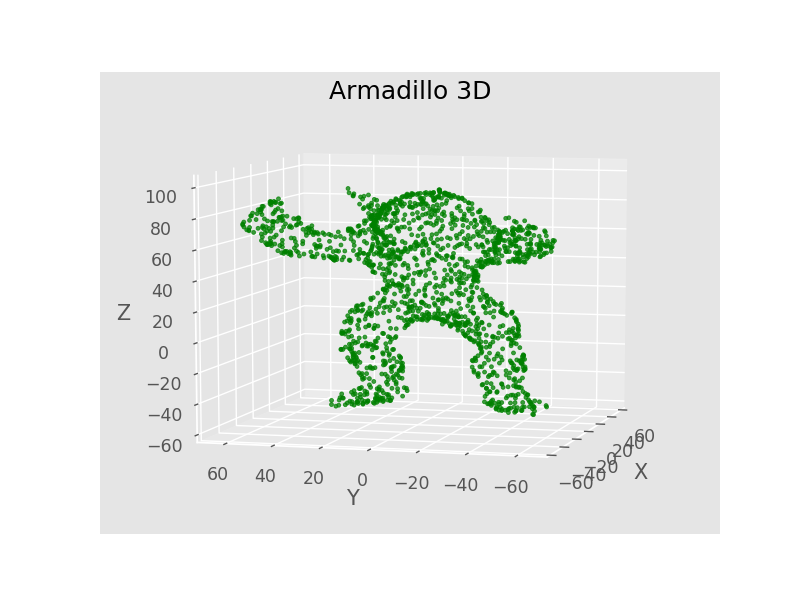

In [10]:
# Render the Original Armadillo

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

In [16]:
pca = do_PCA(armadillo, 'full')

Render the newly transformed PCA armadillo!

<IPython.core.display.Javascript object>


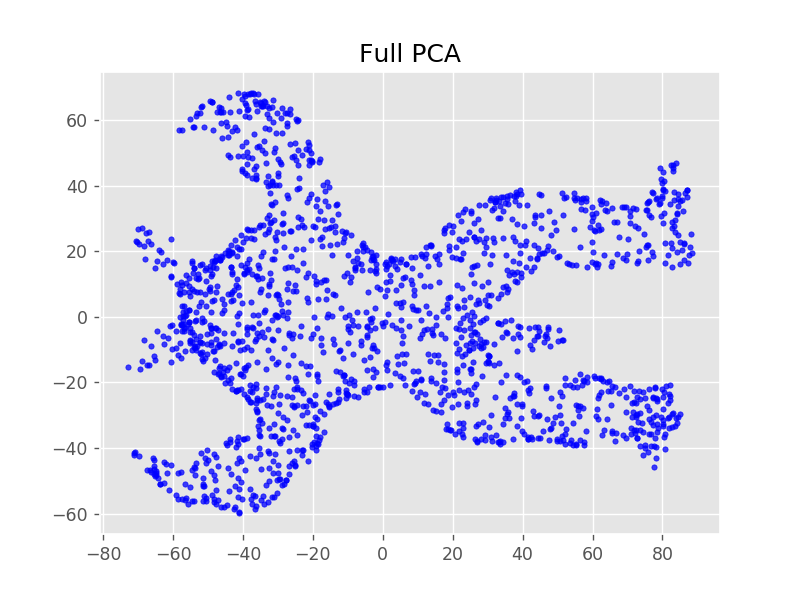

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Full PCA')
ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

In [17]:
rpca = do_PCA(armadillo, 'randomized')

Let's see what the results look like:

<IPython.core.display.Javascript object>


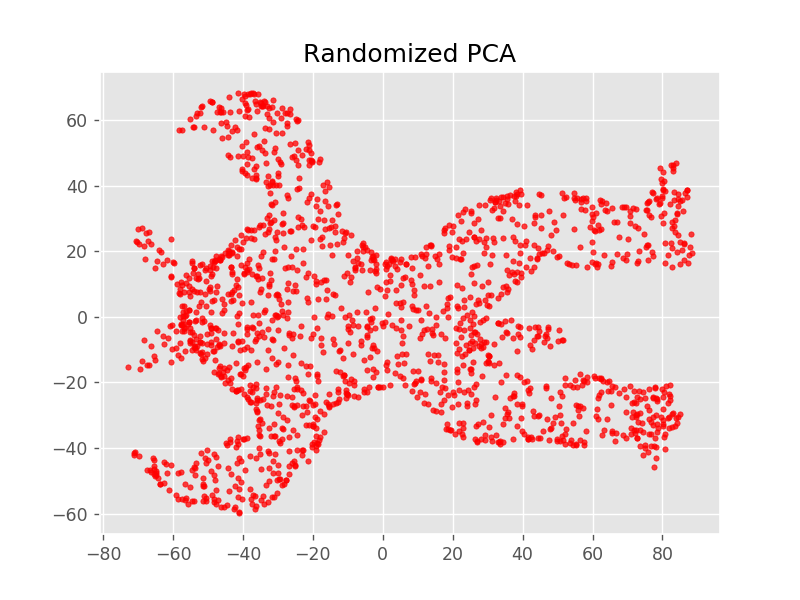

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Randomized PCA')
ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
plt.show()